In [8]:
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
keras.__version__

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


'2.2.4'

In [9]:
width = 28
height = 28

In [10]:
train_dir = '/Users/joannakang/Downloads/Classification/train'

In [3]:
test_dir = '/Users/joannakang/Downloads/Classification/test'

In [4]:
#해당 디렉토리 내에 있는 모든 것을 리스트화 시킨다
class_name = os.listdir(train_dir)
print(class_name)

NameError: name 'os' is not defined

In [5]:
#Train data를 위한 빈 리스트를 만든다
train_input = []
train_label = []

In [6]:
#Test data를 위한 빈 리스트를 만든다
test_input = []
test_label = []

In [7]:
#거리를 동일하게 만든다..?
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(class_name)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

NameError: name 'LabelEncoder' is not defined

In [9]:
#class리스트 갯수만큼 for문을 반복한다
for i in range(len(class_name)):
    #train data 파일 경로 지정, 불러오기
    path = os.path.join(train_dir, class_name[i])
    #서브디렉토리리스트
    img_list = os.listdir(path)
    for j in img_list:
        #이미지 경로를 결합한다 (여기까지는 string, 상대경로를 절대경로로 변환한다)
        img = os.path.join(path, j)
        #이미지를 불러온다(image type으로 바뀜)
        img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        #resize = 그림의 크기를 바꾸고 싶은 사이즈로 바꾼다
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        #reshape = 이미지의 형태를 바꾼다? (픽셀의 갯수?)
        img = img.reshape((width, height, 1))
        #빈 리스트에 img를 넣는다
        train_input.append(img)
        train_label.append(onehot_encoded[i])

In [39]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [33]:
a = 3
b = 5

In [34]:
#함수의 기본 형태
def sum(a,b):
    c = a + b
    print(c)

In [37]:
sum(5,6)
#함수 또는 반복문 안에서 정의된 변수들은 모두 다 지역변수

11


In [10]:
for i in range(len(class_name)):
    #test data 파일 경로 지정, 불러오기
    path = os.path.join(test_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((width, height, 1))
        test_input.append(img)
        test_label.append(onehot_encoded[i])

In [43]:
path = os.path.join(train_dir, class_name[0])
img_list = os.listdir(path)
print (img_list)

['beckham41.jpeg', 'beckham16.jpeg', 'beckham6.jpeg', 'beckham36.jpeg', 'beckham20.jpeg', 'beckham21.jpeg', 'beckham37.jpeg', 'beckham17.jpeg', 'beckham7.jpeg', 'beckham48.jpg', 'beckham30.jpeg', 'beckham26.jpeg', 'beckham49.jpg', 'beckham10.jpeg', 'beckham1.jpeg', 'beckham11.jpeg', 'beckham27.jpeg', 'beckham31.jpeg', 'beckham24.jpeg', 'beckham32.jpeg', 'beckham40.jpg', 'beckham12.jpeg', 'beckham2.jpeg', 'beckham42.jpg', 'beckham45.jpeg', 'beckham28.jpeg', 'beckham43.jpg', 'beckham47.jpg', 'beckham29.jpeg', 'beckham46.jpg', 'beckham44.jpeg', 'beckham13.jpeg', 'beckham3.jpeg', 'beckham33.jpeg', 'beckham50.jpg', 'beckham25.jpeg', 'beckham4.jpeg', 'beckham14.jpeg', 'beckham38.jpeg', 'beckham18.jpeg', 'beckham8.jpeg', 'beckham35.jpg', 'beckham22.jpeg', 'beckham34.jpeg', 'beckham23.jpeg', 'beckham19.jpeg', 'beckham9.jpeg', 'beckham39.jpeg', 'beckham5.jpeg', 'beckham15.jpeg']


In [11]:
print(len((train_input)))
print(len(train_label))
print(len((test_input)))
print(len((test_label)))

150
150
3
3


In [12]:
#np.array = 행렬 만들기 -> 모델에 학습시킬 수 있는 형태로 바꿔야함
train_input = np.array(train_input)
train_label = np.array(train_label)
test_input = np.array(test_input)
test_label = np.array(test_label)
print(train_input.shape)
print(test_input.shape)

(150, 28, 28, 1)
(3, 28, 28, 1)


In [13]:
a = train_input[1].reshape(28, 28)

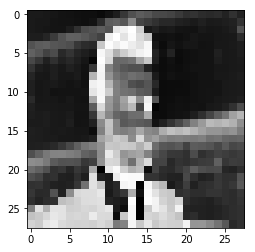

In [14]:
#이미지 파일(train_input)을 받아와서 출력
plt.imshow(a, cmap = 'Greys')

In [15]:
print(train_input.shape)
print(train_label.shape)

(150, 28, 28, 1)
(150, 3)


In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (width, height, train_input.shape[3])))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(train_label.shape[1], activation = 'sigmoid'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
__________

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(x = train_input, y = train_label, batch_size = 5, epochs = 100)

Epoch 1/100
150/150 [==============================] - 0s 3ms/step - loss: 3.2435 - acc: 0.5844
Epoch 2/100
150/150 [==============================] - 0s 943us/step - loss: 1.3182 - acc: 0.6267
Epoch 3/100
150/150 [==============================] - 0s 913us/step - loss: 0.6495 - acc: 0.6622
Epoch 4/100
150/150 [==============================] - 0s 938us/step - loss: 0.5638 - acc: 0.7089
Epoch 5/100
150/150 [==============================] - 0s 906us/step - loss: 0.5521 - acc: 0.7378
Epoch 6/100
150/150 [==============================] - 0s 1ms/step - loss: 0.4972 - acc: 0.7311A: 0s - loss: 0.4383 - acc: 0.79
Epoch 7/100
150/150 [==============================] - 0s 895us/step - loss: 0.4141 - acc: 0.8089
Epoch 8/100
150/150 [==============================] - 0s 963us/step - loss: 0.3830 - acc: 0.8200
Epoch 9/100
150/150 [==============================] - 0s 923us/step - loss: 0.3616 - acc: 0.8244
Epoch 10/100
150/150 [==============================] - 0s 937us/step - loss: 0.2966 - acc

In [20]:
model.evaluate(x = test_input, y = test_label)

3/3 [==============================] - 0s 9ms/step


[2.8197431564331055, 0.7777778506278992]

In [21]:
result = model.predict(x = test_input)

In [22]:
print(result)

[[2.5591435e-06 9.9992788e-01 1.0014199e-05]
 [3.8903620e-02 9.9990082e-01 4.5540268e-08]
 [9.9966836e-01 9.4504579e-04 3.2397318e-09]]


In [23]:
np.argmax(result[0])

1

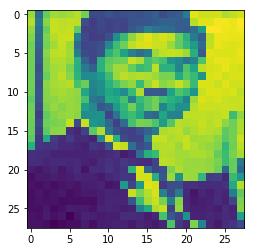

In [24]:
for i in range(len(class_name)):
    plt.imshow(test_input[i].reshape(width, height))